# Импорт библиотек

In [21]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.4 MB/s eta 0:00:00


In [29]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

# библиотека для кодирования признаков
import category_encoders as ce

# для нормализации, стандартизации
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from google.colab import drive

In [12]:
drive.mount('/content/drive')

Mounted at /content/drive


# Настройка CometML
<img src='https://camo.githubusercontent.com/b35adf34bc440ea2ac19bb0d3432f48e26d71ab8e4c256e936b709eec44f5b19/68747470733a2f2f7777772e636f6d65742e6d6c2f696d616765732f6c6f676f5f636f6d65745f6c696768742e706e67' width=500px>

In [3]:
!pip install comet_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.2/532.2 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.1/510.1 kB 38.6 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.5.1
    Uninstalling websocket-client-1.5.1:
      Successfully uninstalled websocket-client-1.5.1


In [4]:
from comet_ml import Experiment

In [7]:
# проект оформлен как публичный
# https://www.comet.com/costam/medical-appointment/bf3ae7f4c83c499d9af2950276662357

# эксперимент с помощью личного API ключа
experiment = Experiment(
    api_key = 'LYwRIf1JyNENEudpGdfXMAF1S',
    project_name = 'medical-appointment',
    workspace = 'costam'
);

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/costam/medical-appointment/bf3ae7f4c83c499d9af2950276662357



# Загрузка данных

In [13]:
# читаем датасет
df = pd.read_csv('/content/drive/MyDrive/SkillFactory/datasets/KaggleV2-May-2016.csv')

# знакомимся с данными
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Визуализация

### Распределение числовых признаков

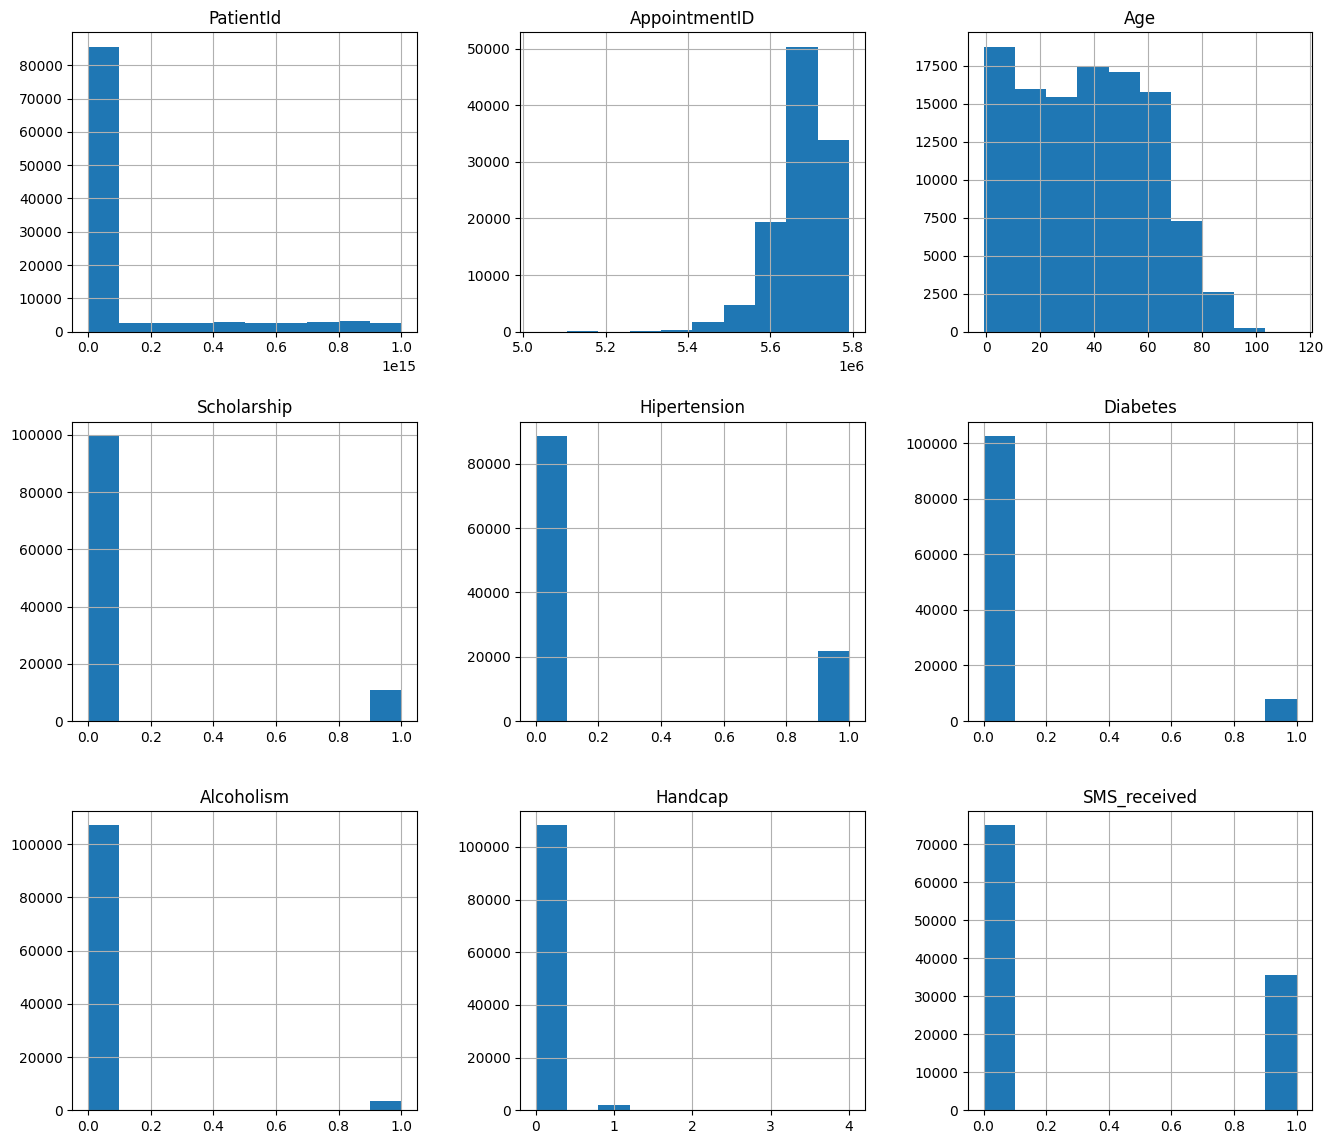

In [14]:
# строим графики
df.hist(figsize = (16, 14))

# логируем график
experiment.log_figure(figure = plt);

*Проанализируем число людей каждого возраста*

In [15]:
print(f"Уникальные значения в 'Age' => {df['Age'].unique()}")

Уникальные значения в 'Age' => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [16]:
# удаляем аномальные значения
df = df[(df['Age'] >= 0) & (df['Age'] <= 110)]

# подсчитываем значения признака 'Age' для гистограммы
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

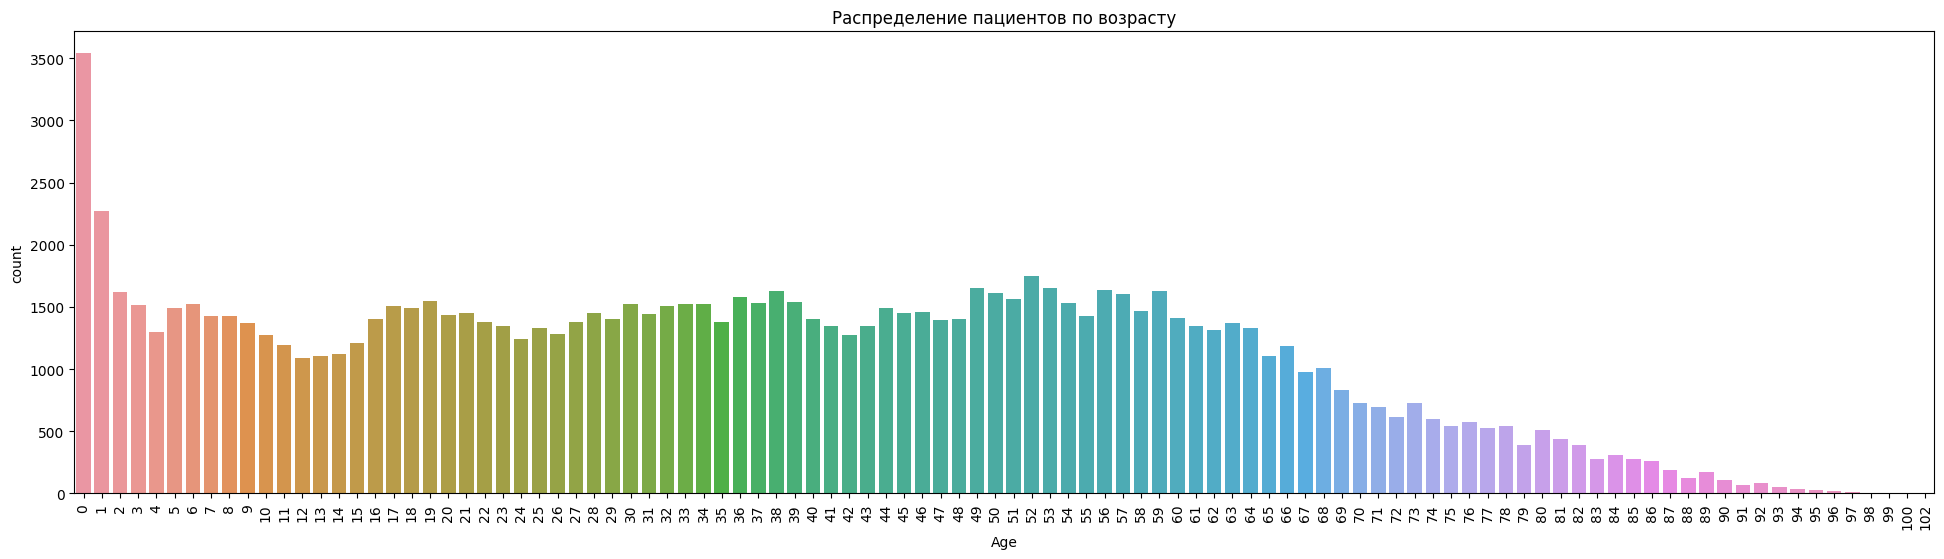

In [17]:
# задаём полотно
plt.figure(figsize = (24,6))

# задаем параметры меток по оси абсцисс
plt.xticks(rotation = 90)

# задаем датасет для построения графика
ax = sns.countplot(x = df['Age'])

# заголовок графика
ax.set_title('Распределение пациентов по возрасту')

# логируем график
experiment.log_figure(figure = plt)

# выводим график
plt.show();

# Придет ли пациент на назначенный прием? 

In [18]:
# сверяемся с типом признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


## Кодировка категориальных признаков

In [24]:
# кодируем признаки методом OneHotEncoder
gender_ohe = ce.OneHotEncoder(use_cat_names=True).fit_transform(df['Gender'])
encoded_columns = pd.concat([df, gender_ohe], axis = 1)

# кодируем признаки методом BinaryEncoder
neighbourhood_bin = ce.BinaryEncoder().fit_transform(encoded_columns['Neighbourhood'])
encoded_columns = pd.concat([encoded_columns, neighbourhood_bin], axis = 1)

# удаляем ненужные для обучения признаки из датасета
encoded_columns.drop(columns=[
    'PatientId',
    'AppointmentID',
    'Gender',
    'ScheduledDay',
    'AppointmentDay',
    'Neighbourhood',
    'No-show'
    ], 
    axis = 1, 
    inplace = True
)

In [25]:
# проверяем признаки
encoded_columns.head()

# сверяемся с типом признаков
encoded_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Age              110521 non-null  int64
 1   Scholarship      110521 non-null  int64
 2   Hipertension     110521 non-null  int64
 3   Diabetes         110521 non-null  int64
 4   Alcoholism       110521 non-null  int64
 5   Handcap          110521 non-null  int64
 6   SMS_received     110521 non-null  int64
 7   Gender_F         110521 non-null  int64
 8   Gender_M         110521 non-null  int64
 9   Neighbourhood_0  110521 non-null  int64
 10  Neighbourhood_1  110521 non-null  int64
 11  Neighbourhood_2  110521 non-null  int64
 12  Neighbourhood_3  110521 non-null  int64
 13  Neighbourhood_4  110521 non-null  int64
 14  Neighbourhood_5  110521 non-null  int64
 15  Neighbourhood_6  110521 non-null  int64
dtypes: int64(16)
memory usage: 14.3 MB


In [26]:
# задаём "столбец обучения"
y = df['No-show']

# знакомимся с данными
y

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: No-show, Length: 110521, dtype: object

In [28]:
# заменяем значения числовыми
y = y.replace({'No': 0, 'Yes': 1})

# рассчитываем относительную частоту уникальных значений
y.value_counts(normalize = True)

0    0.798084
1    0.201916
Name: No-show, dtype: float64

## Шкалирование данных

In [31]:
# задаём скейлер
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_columns)

In [32]:
# выводим размерность датасета
print(X.shape)

(110521, 16)


# Модель (этот раздел будет подробно изучен далее в курсе)

### Инициализация модели

In [33]:
# задаем алгоритм регрессии
logreg = LogisticRegression()

# фиксируем воспроизводимость результатов
random_state = 42

### Обучение модели

In [34]:
logreg.fit(X, y);

### Логирование параметров обучения

In [35]:
params = {'random_state': random_state,
        'model_type': 'logreg'
}

experiment.log_parameters(params)

### Предсказания модели

In [36]:
y_pred = logreg.predict(X)

### Анализ модели

In [37]:
accuracy = accuracy_score(y, y_pred)

print('Доля правильных ответов: {:6.3f}'.format(accuracy))

Доля правильных ответов:  0.798


# Логирование метрик

In [38]:
metrics = {'accuracy':accuracy}
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(y.tolist(), y_pred.tolist());

In [39]:
# вывод результатов экперимента
experiment.display()

# Домашнее задание

Визуализируйте корреляцию между числовыми признаками, использованными для обучения модели и залогируйте изображение в Comet.

В качестве ответа приложите обновленный ноутбук.

*Форма оценки ментором:*

1) Проведена визуализация корреляции между 7 числовыми признаками, использованными для обучения модели - 5 баллов

2) Произведено логирование графика в CometMl - 10 баллов



In [40]:
# создаём копию датасета
data = df.copy()

# убираем нечисловые признаки
data.drop(columns = [
    'PatientId',
    'AppointmentID',
    'Gender',
    'ScheduledDay',
    'AppointmentDay',
    'Neighbourhood',
    'No-show'
    ],
    inplace = True
)

# сверяемся с типом признаков
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Age           110521 non-null  int64
 1   Scholarship   110521 non-null  int64
 2   Hipertension  110521 non-null  int64
 3   Diabetes      110521 non-null  int64
 4   Alcoholism    110521 non-null  int64
 5   Handcap       110521 non-null  int64
 6   SMS_received  110521 non-null  int64
dtypes: int64(7)
memory usage: 6.7 MB


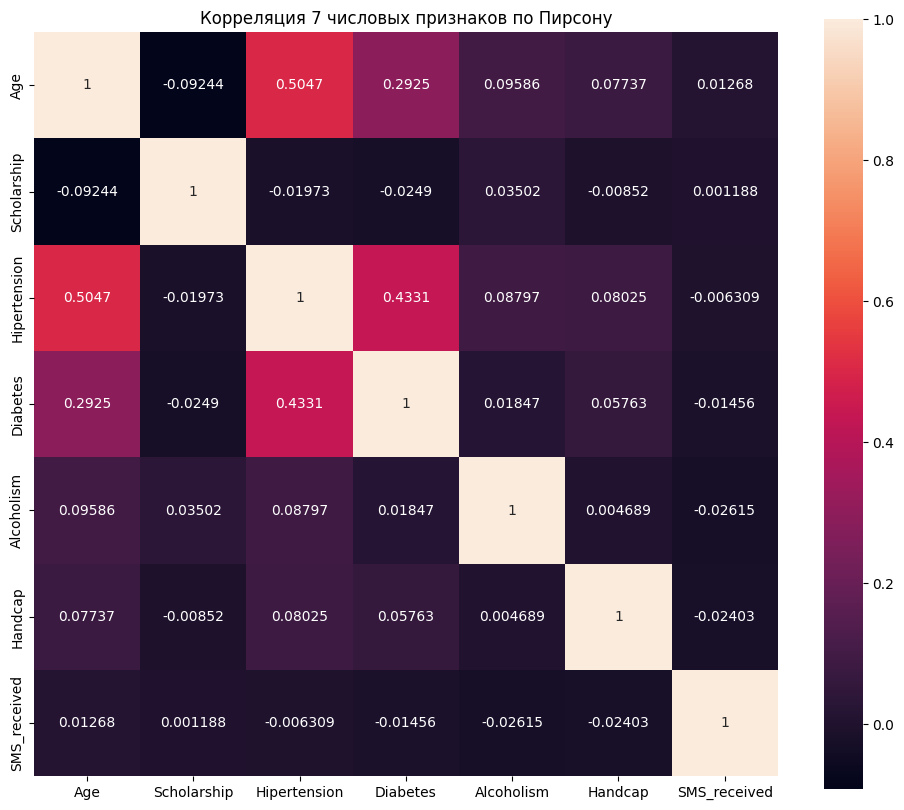

In [43]:
# формируем полотно
plt.figure(figsize = (12, 10))

# строим график
ax = sns.heatmap(
    data.corr(method = 'pearson', numeric_only = True), 
    annot = True, 
    fmt = '0.4g', 
    square = True,
)

# меняем заголовок графика
ax.set_title('Корреляция 7 числовых признаков по Пирсону')

# логируем график
experiment.log_figure(figure = plt)

# отображаем график
plt.show();

In [44]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/costam/medical-appointment/bf3ae7f4c83c499d9af2950276662357
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.7980836221170637
COMET INFO:   Parameters:
COMET INFO:     model_type   : logreg
COMET INFO:     random_state : 42
COMET INFO:   Uploads:
COMET INFO:     confusion-matrix    : 1
COMET INFO:     environment details : 1
COMET INFO:     figures             : 3
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, 